교수님 github: https://github.com/Joocheol/Financial-Engineering/blob/master/20211106.ipynb
See also: https://gist.github.com/jteichma/4d9c0079dbf4e9c3cdff3fd1befabd23

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
r = 0.0
sig = 0.2
T = 30 / 365

M = 100
N = 100

dt = T / N
rdt = r * dt
sigsdt = sig * np.sqrt(dt)

In [3]:
np.random.seed(100)

S0 = 100

S = np.empty([M, N+1])
rv = np.random.normal(rdt, sigsdt, [M, N])

In [4]:
for i in range(M):
    S[i, 0] = S0
    for j in range(N):
        S[i, j + 1] = S[i, j] * (1 + rv[i, j])

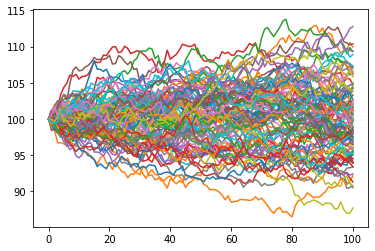

In [5]:
for i in range(M):
    plt.plot(S[i, :])
    
plt.show()

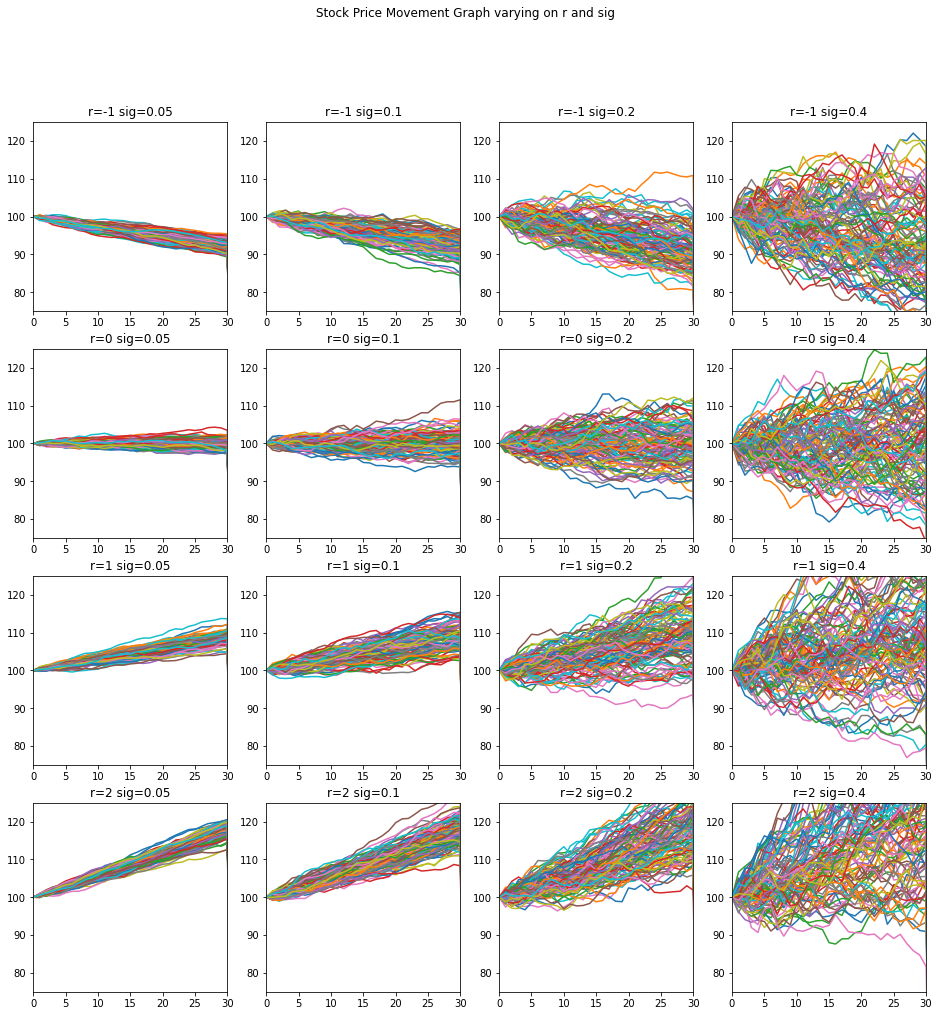

In [6]:
def stock_price_movement_plot():

    S0 = 100
    K = 100
    T = 30 / 365
    
    r = 0.0
    sig = 0.2

    M = 100
    N = 100

    dt = T / N
    rdt = r * dt
    sigsdt = sig * np.sqrt(dt)

    d1 = (np.log(S0/K) + (r + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S0/K) + (r - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))

    # price of call option
    S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

    M = 100  # month
    N = 30

    fig = plt.figure(figsize=(16, 16))

    for ind_x, r in enumerate([-1, 0, 1, 2]):
        for ind_y, sig in enumerate([0.05, 0.1, 0.2, 0.4]):

            ax = fig.add_subplot(4, 4, ind_x * 4 + ind_y + 1)

            S = np.random.normal(size=[M, N+1])  # scenario

            for i in range(M):
                for j in range(N):
                    if j == 0:
                        S[i,j] = S0 * (1 + r*T/N + sig * np.sqrt(T/N) * S[i,j])
                    else:
                        S[i,j] = S[i,j-1] * (1+ r*T/N + sig * np.sqrt(T/N) * S[i,j])

            for i in range(M):
                ax.plot([S0, *S[i, :]])

            ax.set_xlim(0, 30)
            ax.set_ylim(75, 125)
            ax.set_title(f"r={r} sig={sig}")

    fig.suptitle("Stock Price Movement Graph varying on r and sig")
    plt.show()


stock_price_movement_plot()

In [7]:
M = 1000
N = 100

S0 = 100

S = np.empty([M, N+1])
rv = np.random.normal(rdt, sigsdt, [M, N])

for i in range(M):
    S[i, 0] = S0
    for j in range(N):
        S[i, j + 1] = S[i, j] * (1 + rv[i, j])

In [8]:
m = 64
K = 100

hedge = 0
cost = 0

for j in range(N):
    dl = (np.log(S[m, j] / K) + (r + 0.5 * sig ** 2) * (T - j * dt)) / (sig * np.sqrt(T - j * dt))
    delta = norm.cdf(dl)
    # delta: 몇개의 주식을 사는지 비율 ( * 100개: 개수 )
    # delta - hedge: 몇개만큼 사고팔아야하냐
    cost = cost + (hedge - delta) * S[m, j]  # 비용을 얼마나 얻거냐 지출하느냐의 누적비용
#     print(S[m, j], delta, delta - hedge, cost)
    hedge = delta
    
if S[m, N] > K:
    delta = 1
    cost = cost + K
else:
    delta = 0
    cost = cost + S[m, N] * hedge

print(S[m, j], 0, cost)

100.2905195908394 0 -1.8038880145588223


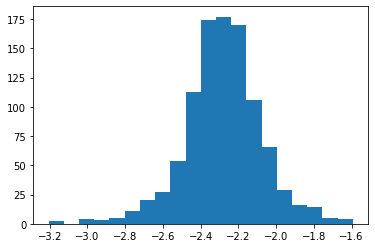

In [9]:
K = 100

s = []

for i in range(M):
    hedge = 0
    cost = 0
    for j in range(N):
        dl = (np.log(S[i, j] / K) + (r + 0.5 * sig ** 2) * (T - j * dt)) / (sig * np.sqrt(T - j * dt))
        delta = norm.cdf(dl)
        cost = cost + (hedge - delta) * S[i, j]
        hedge = delta
    if S[i, N] > K:
        cost = cost + (hedge - 1) * S[i, N] + K
    else:
        cost = cost + (hedge - 0) * S[i, N]
    s.append(cost)
    
plt.hist(s, bins=20)
plt.show()  # 중간이 call option의 가격으로 수렴

In [10]:
d1 = (np.log(S0/K)+(r+0.5*sig**2)*(T))/(sig*np.sqrt(T))
d2 = (np.log(S0/K)+(r-0.5*sig**2)*(T))/(sig*np.sqrt(T))

S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

2.2871506280449694

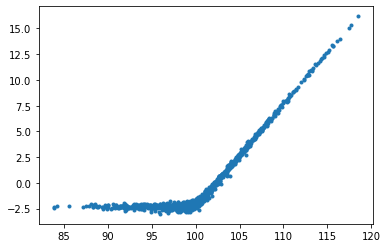

In [11]:
a = []

K = 100

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    
    cost = cost + hedge*S[i,N]
        

    a.append(cost)
    
# call option의 payoff
plt.plot(S[:,-1], a, marker=".", linestyle='none')
plt.show()

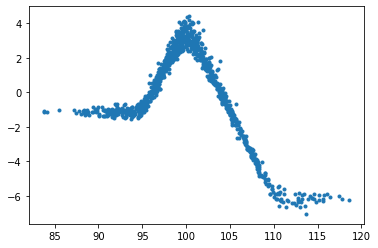

In [12]:
a = []

K_1 = 95
K_2 = 100
K_3 = 110

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1_1 = (np.log(S[i,j]/K_1)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_1 = norm.cdf(d1_1)  
        d1_2 = (np.log(S[i,j]/K_2)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_2 = norm.cdf(d1_2)  
        d1_3 = (np.log(S[i,j]/K_3)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_3 = norm.cdf(d1_3)  
        delta = delta_1 - 2*delta_2 + delta_3
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    
    cost = cost + hedge*S[i,N]
        
    a.append(cost)
    
plt.plot(S[:,-1], a, marker=".", linestyle='none')
plt.show()

In [ ]:
a = []

K_1 = 95
K_2 = 100
K_3 = 110

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1_1 = (np.log(S[i,j]/K_1)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_1 = norm.cdf(d1_1)  
        d1_2 = (np.log(S[i,j]/K_2)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_2 = norm.cdf(d1_2)  
        d1_3 = (np.log(S[i,j]/K_3)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_3 = norm.cdf(d1_3)  
        delta = delta_1 - 2*delta_2 + delta_3
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    
    cost = cost + hedge * S[i,N] + (- np.maximum(S[i,N]-K_1,0) + 2 * np.maximum(S[i,N]-K_2,0) - np.maximum(S[i,N]-K_3,0))

    a.append(cost)

plt.hist(a, bins=20)
plt.show()